In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [8]:
data = pd.read_csv("data.csv")

In [9]:
data.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [10]:
data.tail(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [11]:
data.shape

(18207, 89)

In [12]:
data.set_index("Age", inplace = True)

data.head(5)

,Unnamed: 0,ID,Name,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,,,,,,,,,,,,,,,,,,,,,
31,0,158023,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
33,1,20801,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
26,2,190871,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
27,3,193080,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
27,4,192985,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
data["Name"][27]

27              De Gea
27        K. De Bruyne
27           E. Hazard
27            N. Kanté
27        A. Griezmann
27          L. Insigne
27        K. Koulibaly
27         Alex Sandro
27       Douglas Costa
27              Thiago
27           R. Mahrez
27        A. Lacazette
27          K. Manolas
27            A. Lopes
27         I. Gündoğan
27       Lucas Vázquez
27            S. Savić
27               Allan
27             Rodrigo
27            K. Kampl
27       Marcos Alonso
27        M. Balotelli
27         A. Kramarić
27         A. Florenzi
27             S. Sané
27    Gabriel Paulista
27       W. Ben Yedder
27          C. Bakambu
27              Bartra
27           S. Coates
            ...       
27          B. McGrath
27           J. Medina
27           A. DeJohn
27            M. López
27        K. Chvedukas
27        L. Ridehalgh
27             S. Acka
27              Sun Bo
27          S. Abraham
27            Li Guang
27         L. Italiano
27            Han Xuan
27         

In [14]:
data.corr()

,Unnamed: 0,ID,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,-0.390062,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.415757,1.000000,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Overall,-0.972791,-0.417025,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633395,0.047074,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.596508,-0.231352,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.413322,-0.356191,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.204026,-0.075784,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.415672,-0.056914,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.213645,0.182074,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,...,-0.028023,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255
Crossing,-0.390062,-0.131994,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,-0.076585,1.000000,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539


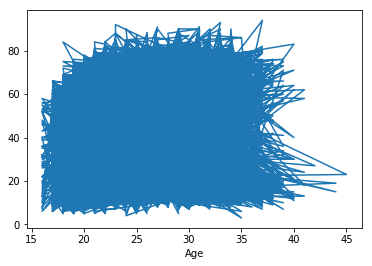

In [15]:
#for i in range(45):
#    if i > 15:
#        x = data["Name"][i].shape[0]
#        plot.scatter(i, x, s = 10, color = 'blue')
#plot.show()

x = data["Marking"].plot()
plot.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([49.5, 49.6, 49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4, 50.5]),
 <a list of 10 Patch objects>)

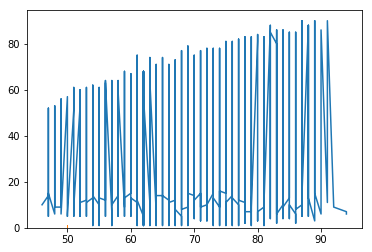

In [20]:
plot.plot(data['Overall'], data['GKDiving'])
plot.hist(50)

In [21]:
data[data['ID'] > 246600]

,Unnamed: 0,ID,Name,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,,,,,,,,,,,,,,,,,,,,,
21,10269,246608,Fidalgo,https://cdn.sofifa.org/players/4/19/246608.png,Spain,https://cdn.sofifa.org/flags/45.png,65,75,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,68.0,46.0,51.0,47.0,10.0,9.0,10.0,11.0,9.0,€2M
18,11327,246606,Fran García,https://cdn.sofifa.org/players/4/19/246606.png,Spain,https://cdn.sofifa.org/flags/45.png,64,79,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,60.0,58.0,59.0,9.0,6.0,12.0,9.0,11.0,€2.2M
19,13357,246613,J. Zwarts,https://cdn.sofifa.org/players/4/19/246613.png,Netherlands,https://cdn.sofifa.org/flags/34.png,62,77,Feyenoord,https://cdn.sofifa.org/teams/2/light/246.png,...,51.0,18.0,22.0,17.0,8.0,12.0,8.0,7.0,6.0,€1.3M
19,13372,246617,Javi Mier,https://cdn.sofifa.org/players/4/19/246617.png,Spain,https://cdn.sofifa.org/flags/45.png,62,76,Real Oviedo,https://cdn.sofifa.org/teams/2/light/110827.png,...,55.0,35.0,48.0,42.0,11.0,7.0,11.0,10.0,7.0,€1.4M
19,14842,246603,Matis Carvalho,https://cdn.sofifa.org/players/4/19/246603.png,Portugal,https://cdn.sofifa.org/flags/38.png,60,73,Toulouse Football Club,https://cdn.sofifa.org/teams/2/light/1809.png,...,51.0,10.0,13.0,12.0,59.0,59.0,59.0,59.0,61.0,€788K
18,15960,246602,A. Canessa,https://cdn.sofifa.org/players/4/19/246602.png,Italy,https://cdn.sofifa.org/flags/27.png,58,73,Livorno,https://cdn.sofifa.org/teams/2/light/1844.png,...,49.0,19.0,20.0,16.0,7.0,6.0,9.0,15.0,11.0,€566K
18,15987,246616,José Uche,https://cdn.sofifa.org/players/4/19/246616.png,Spain,https://cdn.sofifa.org/flags/45.png,58,69,SD Huesca,https://cdn.sofifa.org/teams/2/light/110839.png,...,43.0,59.0,57.0,48.0,13.0,12.0,9.0,14.0,7.0,€432K
19,16389,246609,J. Requena,https://cdn.sofifa.org/players/4/19/246609.png,Argentina,https://cdn.sofifa.org/flags/52.png,57,72,Newell's Old Boys,https://cdn.sofifa.org/teams/2/light/110396.png,...,58.0,57.0,53.0,58.0,11.0,7.0,6.0,12.0,11.0,€468K
16,17921,246601,J. Rowland,https://cdn.sofifa.org/players/4/19/246601.png,England,https://cdn.sofifa.org/flags/14.png,51,66,Shrewsbury,https://cdn.sofifa.org/teams/2/light/127.png,...,52.0,36.0,31.0,30.0,12.0,10.0,7.0,6.0,12.0,€166K


In [99]:
data.sort_values('ID')

,Unnamed: 0,ID,Name,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,,,,,,,,,,,,,,,,,,,,,
37,4014,16,Luis García,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
34,76,41,Iniesta,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
37,725,80,E. Belözoğlu,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
37,5328,164,G. Pinzi,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
35,9427,657,D. Vaughan,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K
33,1571,768,Felipe,https://cdn.sofifa.org/players/4/19/768.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,SPAL,https://cdn.sofifa.org/teams/2/light/112791.png,...,68.0,77.0,80.0,76.0,11.0,6.0,8.0,9.0,5.0,€4.9M
40,41,1179,G. Buffon,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
35,2834,2147,M. Stekelenburg,https://cdn.sofifa.org/players/4/19/2147.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,73,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,59.0,9.0,15.0,14.0,71.0,72.0,76.0,73.0,73.0,€1.8M
38,12190,2335,A. Wilbraham,https://cdn.sofifa.org/players/4/19/2335.png,England,https://cdn.sofifa.org/flags/14.png,63,63,Rochdale,https://cdn.sofifa.org/teams/2/light/1955.png,...,69.0,24.0,20.0,19.0,12.0,13.0,10.0,10.0,9.0,€228K


In [100]:
data.sort_values('ID', ascending = False)

,Unnamed: 0,ID,Name,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,,,,,,,,,,,,,,,,,,,,,
17,17931,246620,E. McCue,https://cdn.sofifa.org/players/4/19/246620.png,Sweden,https://cdn.sofifa.org/flags/46.png,51,74,Houston Dynamo,https://cdn.sofifa.org/teams/2/light/698.png,...,49.0,49.0,49.0,46.0,9.0,13.0,11.0,15.0,10.0,€175K
19,13372,246617,Javi Mier,https://cdn.sofifa.org/players/4/19/246617.png,Spain,https://cdn.sofifa.org/flags/45.png,62,76,Real Oviedo,https://cdn.sofifa.org/teams/2/light/110827.png,...,55.0,35.0,48.0,42.0,11.0,7.0,11.0,10.0,7.0,€1.4M
18,15987,246616,José Uche,https://cdn.sofifa.org/players/4/19/246616.png,Spain,https://cdn.sofifa.org/flags/45.png,58,69,SD Huesca,https://cdn.sofifa.org/teams/2/light/110839.png,...,43.0,59.0,57.0,48.0,13.0,12.0,9.0,14.0,7.0,€432K
19,13357,246613,J. Zwarts,https://cdn.sofifa.org/players/4/19/246613.png,Netherlands,https://cdn.sofifa.org/flags/34.png,62,77,Feyenoord,https://cdn.sofifa.org/teams/2/light/246.png,...,51.0,18.0,22.0,17.0,8.0,12.0,8.0,7.0,6.0,€1.3M
19,16389,246609,J. Requena,https://cdn.sofifa.org/players/4/19/246609.png,Argentina,https://cdn.sofifa.org/flags/52.png,57,72,Newell's Old Boys,https://cdn.sofifa.org/teams/2/light/110396.png,...,58.0,57.0,53.0,58.0,11.0,7.0,6.0,12.0,11.0,€468K
21,10269,246608,Fidalgo,https://cdn.sofifa.org/players/4/19/246608.png,Spain,https://cdn.sofifa.org/flags/45.png,65,75,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,68.0,46.0,51.0,47.0,10.0,9.0,10.0,11.0,9.0,€2M
18,11327,246606,Fran García,https://cdn.sofifa.org/players/4/19/246606.png,Spain,https://cdn.sofifa.org/flags/45.png,64,79,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,60.0,58.0,59.0,9.0,6.0,12.0,9.0,11.0,€2.2M
19,14842,246603,Matis Carvalho,https://cdn.sofifa.org/players/4/19/246603.png,Portugal,https://cdn.sofifa.org/flags/38.png,60,73,Toulouse Football Club,https://cdn.sofifa.org/teams/2/light/1809.png,...,51.0,10.0,13.0,12.0,59.0,59.0,59.0,59.0,61.0,€788K
18,15960,246602,A. Canessa,https://cdn.sofifa.org/players/4/19/246602.png,Italy,https://cdn.sofifa.org/flags/27.png,58,73,Livorno,https://cdn.sofifa.org/teams/2/light/1844.png,...,49.0,19.0,20.0,16.0,7.0,6.0,9.0,15.0,11.0,€566K
